In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

class_df = pd.read_csv('/content/drive/MyDrive/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')
lable_df = pd.read_csv('/content/drive/MyDrive/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv')

In [3]:
class_df.head(5)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [4]:
lable_df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [5]:
import numpy as np
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return np.transpose(pd.concat([total, percent], axis=1, keys=['Total', 'Percent']))
missing_data(lable_df)

,height,width,y,x,Target,patientId
Total,20672.000000,20672.000000,20672.000000,20672.000000,0.0,0.0
Percent,68.389188,68.389188,68.389188,68.389188,0.0,0.0


In [6]:
missing_data(class_df)

,class,patientId
Total,0.0,0.0
Percent,0.0,0.0


In [7]:
import gc
merged_df = lable_df.merge(class_df, left_on='patientId', right_on='patientId', how='inner')
del class_df, lable_df
gc.collect()

merged_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37629 entries, 0 to 37628
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  37629 non-null  object 
 1   x          16957 non-null  float64
 2   y          16957 non-null  float64
 3   width      16957 non-null  float64
 4   height     16957 non-null  float64
 5   Target     37629 non-null  int64  
 6   class      37629 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.3+ MB


In [8]:
merged_df.head(5)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [9]:
merged_df = merged_df.drop_duplicates()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37627
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [10]:
merged_df = merged_df.fillna(0)
merged_df.head(10)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
6,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
8,00569f44-917d-4c86-a842-81832af98c30,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
9,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
10,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity
12,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity


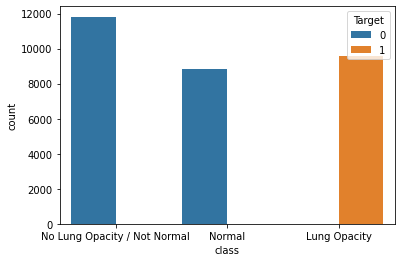

In [11]:
import seaborn as sns
sns.countplot(x = 'class', hue = 'Target', data = merged_df);

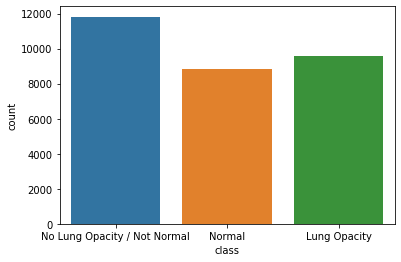

In [12]:
sns.countplot(x = 'class', data = merged_df)

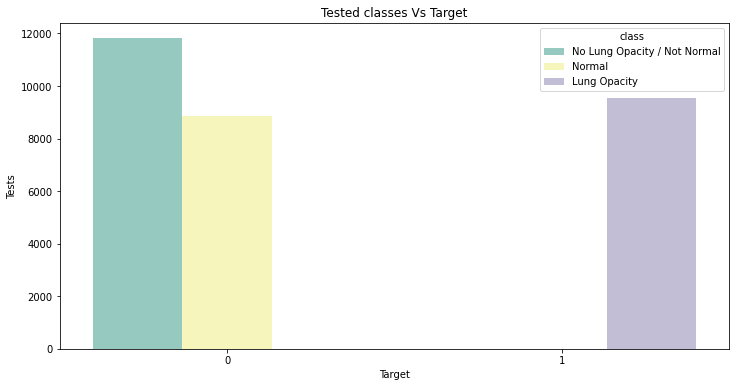

In [13]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=1,figsize=(12,6))
tmp = merged_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Tests': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Tests',hue='class',data=df, palette='Set3')
plt.title("Tested classes Vs Target")
plt.show()

In [14]:
total = merged_df.shape[0]
nopneumonia = merged_df[merged_df['Target'] == 0].shape[0]
pneumonia = merged_df[merged_df['Target'] == 1].shape[0]
print(f'Total No of samples: {total}')
print(f'No of cases without Pneumonia: {nopneumonia}')
print(f'No of cases with Pneumonia: {pneumonia}')

Total No of samples: 30227
No of cases without Pneumonia: 20672
No of cases with Pneumonia: 9555


In [15]:
pneumonia_per = (pneumonia/total)*100
nopneumonia_per = (nopneumonia/total)*100
print(f'Percentage of cases without Pneumonia: {nopneumonia_per}')
print(f'Percentage of cases with Pneumonia: {pneumonia_per}')

Percentage of cases without Pneumonia: 68.38918847388096
Percentage of cases with Pneumonia: 31.610811526119033


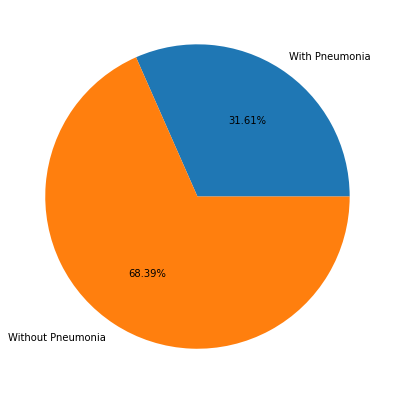

In [16]:
plt_heading = ['With Pneumonia','Without Pneumonia']
plt_data = [pneumonia_per,nopneumonia_per]
fig = plt.figure(figsize =(10, 7)) 
plt.pie(plt_data, labels = plt_heading, autopct='%1.2f%%') 
plt.show() 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

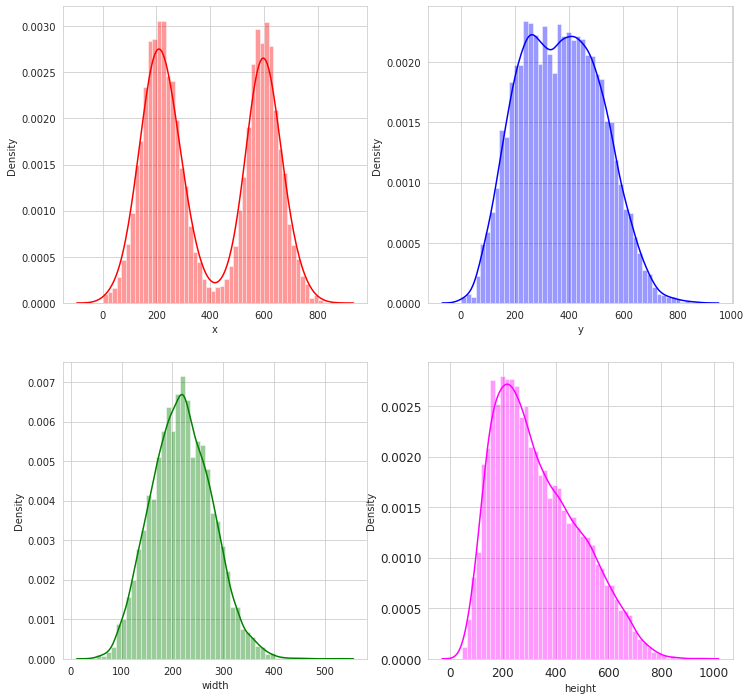

In [17]:
target1 = merged_df[merged_df['Target']==1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(target1['x'],kde=True,bins=50, color="red", ax=ax[0,0])
sns.distplot(target1['y'],kde=True,bins=50, color="blue", ax=ax[0,1])
sns.distplot(target1['width'],kde=True,bins=50, color="green", ax=ax[1,0])
sns.distplot(target1['height'],kde=True,bins=50, color="magenta", ax=ax[1,1])
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

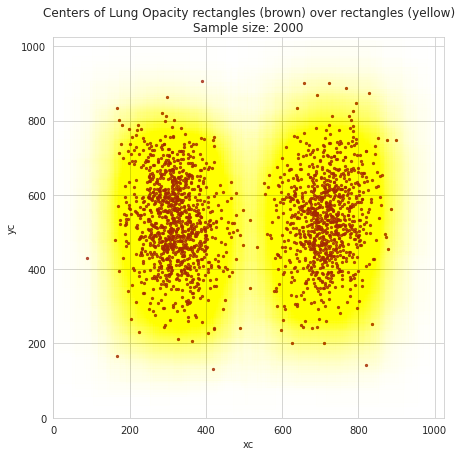

In [18]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1,1,figsize=(7,7))
target_sample = target1.sample(2000)
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2
plt.title("Centers of Lung Opacity rectangles (brown) over rectangles (yellow)\nSample size: 2000")
target_sample.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color="brown")
for i, crt_sample in target_sample.iterrows():
    ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
                width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color="yellow"))
plt.show()

In [19]:
merged_df['patientId'].value_counts().value_counts()

1    23286
2     3266
3      119
4       13
Name: patientId, dtype: int64

In [20]:
merged_df[merged_df['Target'] == 0]['patientId'].value_counts().value_counts()

1    20672
Name: patientId, dtype: int64

In [21]:
merged_df[merged_df['class'] == 'Lung Opacity']['Target'].value_counts(dropna = False)

1    9555
Name: Target, dtype: int64

In [22]:
merged_df[merged_df['class'] == 'No Lung Opacity / Not Normal']['Target'].value_counts(dropna = False)

0    11821
Name: Target, dtype: int64

In [23]:
merged_df[merged_df['class'] == 'Normal']['Target'].value_counts(dropna = False)

0    8851
Name: Target, dtype: int64

Only class Lung Opacity has pneumonia on the train set.

In [24]:
print('Patients can have {} different classes'.format(merged_df.groupby('patientId')['class'].nunique().nunique()))

Patients can have 1 different classes


In [25]:
img_attrb_df = pd.read_csv ('/content/drive/MyDrive/rsna-pneumonia-detection-challenge/image_meta_df.csv')

In [26]:
img_attrb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientAge        26684 non-null  int64 
 1   BodyPartExamined  26684 non-null  object
 2   ViewPosition      26684 non-null  object
 3   PatientSex        26684 non-null  object
 4   path              26684 non-null  object
 5   patientId         26684 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [27]:
img_attrb_df.head(10)

,PatientAge,BodyPartExamined,ViewPosition,PatientSex,path,patientId
0,59,CHEST,PA,M,./data/dicom_train_images/f79e5a75-5e15-431a-9...,f79e5a75-5e15-431a-9ba3-de64c1724b65
1,43,CHEST,PA,F,./data/dicom_train_images/f79fa94e-8886-425c-9...,f79fa94e-8886-425c-95d4-81abfea92aee
2,45,CHEST,AP,F,./data/dicom_train_images/f79fc759-fde0-4e2e-8...,f79fc759-fde0-4e2e-8951-26ac8af5ef89
3,52,CHEST,PA,M,./data/dicom_train_images/f7a169e2-a1a7-439a-a...,f7a169e2-a1a7-439a-ab83-0d34cf5ae4b9
4,26,CHEST,AP,M,./data/dicom_train_images/f7a172fc-a34f-4155-8...,f7a172fc-a34f-4155-806d-7b0afe2a6156
5,61,CHEST,PA,F,./data/dicom_train_images/f7a1de8c-7802-4af3-9...,f7a1de8c-7802-4af3-98c4-4dfb088b986d
6,35,CHEST,PA,F,./data/dicom_train_images/f7a37b72-fda5-4adc-b...,f7a37b72-fda5-4adc-b3b0-968c923bc1c6
7,34,CHEST,AP,M,./data/dicom_train_images/f7a42b73-f909-4e1f-8...,f7a42b73-f909-4e1f-89dd-c776f45cdc40
8,38,CHEST,AP,F,./data/dicom_train_images/f7a488d3-34b2-4bcf-b...,f7a488d3-34b2-4bcf-b61a-b4ad12c230e0
9,50,CHEST,PA,M,./data/dicom_train_images/f7a5fd29-dd8d-4f85-8...,f7a5fd29-dd8d-4f85-8164-69b2e83da35e


In [28]:
merged_df = merged_df.merge(img_attrb_df, left_on='patientId', right_on='patientId', how='inner')
del img_attrb_df
gc.collect()

merged_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patientId         30227 non-null  object 
 1   x                 30227 non-null  float64
 2   y                 30227 non-null  float64
 3   width             30227 non-null  float64
 4   height            30227 non-null  float64
 5   Target            30227 non-null  int64  
 6   class             30227 non-null  object 
 7   PatientAge        30227 non-null  int64  
 8   BodyPartExamined  30227 non-null  object 
 9   ViewPosition      30227 non-null  object 
 10  PatientSex        30227 non-null  object 
 11  path              30227 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 3.0+ MB


In [29]:
to_drop = merged_df.nunique()
to_drop = to_drop[(to_drop <= 1) | (to_drop == to_drop['patientId'])].index
to_drop = to_drop.drop('patientId')
to_drop

Index(['BodyPartExamined', 'path'], dtype='object')

In [30]:
merged_df.drop(to_drop, axis = 1, inplace = True)
merged_df.head()

,patientId,x,y,width,height,Target,class,PatientAge,ViewPosition,PatientSex
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,51,PA,F
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,48,PA,F
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,19,AP,M
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,Normal,28,PA,M
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,32,AP,F


In [31]:
merged_df.nunique()

patientId       26684
x                 749
y                 727
width             352
height            726
Target              2
class               3
PatientAge         97
ViewPosition        2
PatientSex          2
dtype: int64

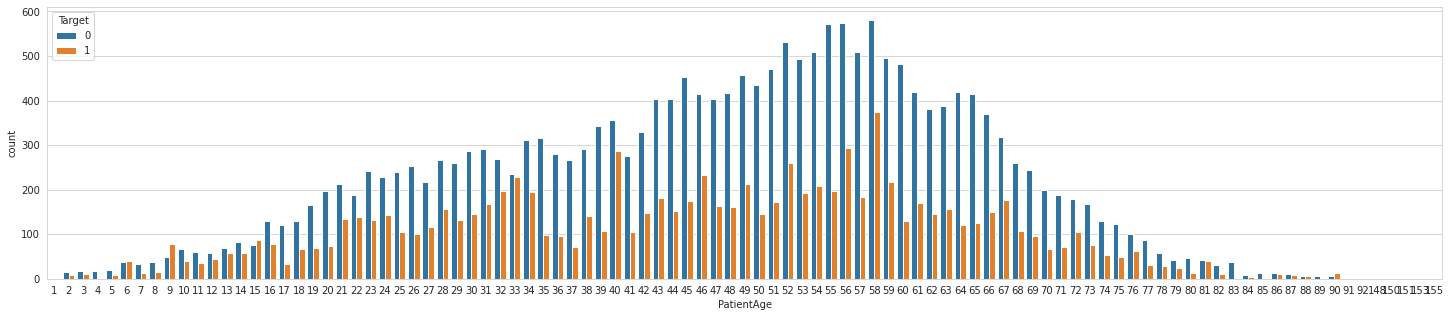

In [32]:
plt.figure(figsize = (25, 5))
sns.countplot(x = 'PatientAge', hue = 'Target', data = merged_df);

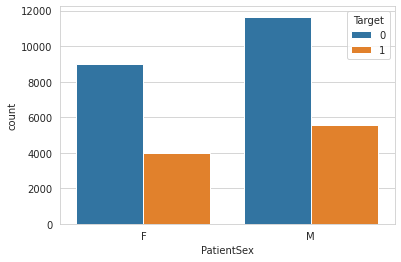

In [33]:
sns.countplot(x = 'PatientSex', hue = 'Target', data = merged_df);

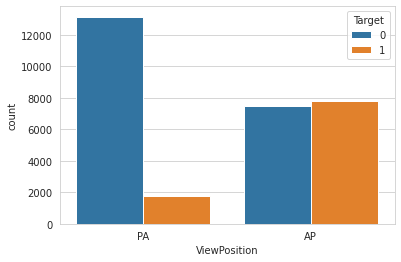

In [34]:
sns.countplot(x = 'ViewPosition', hue = 'Target', data = merged_df);

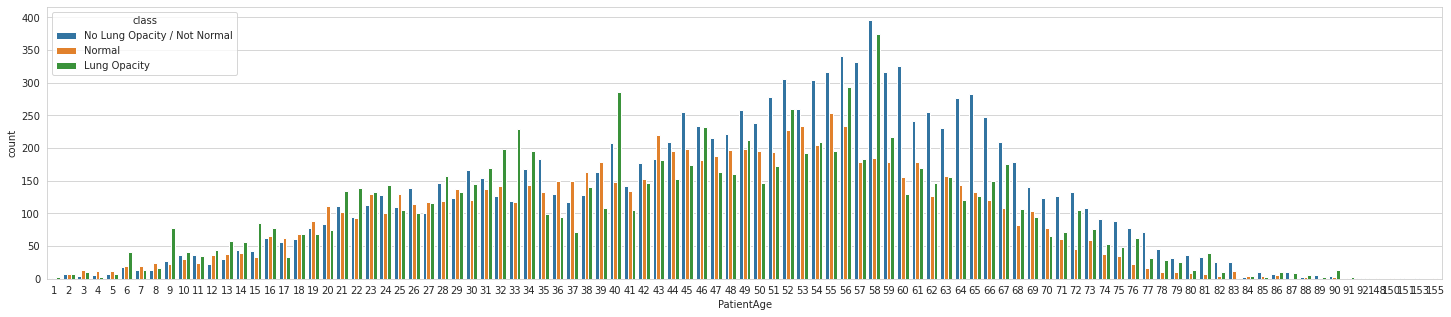

In [35]:
plt.figure(figsize = (25, 5))
sns.countplot(x = 'PatientAge', hue = 'class', data = merged_df);

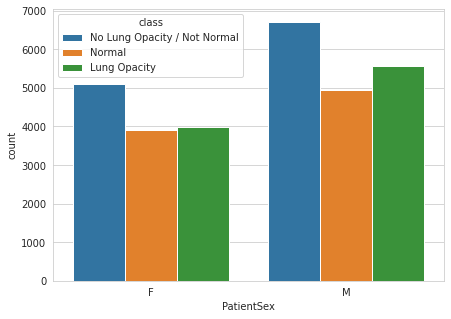

In [36]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'PatientSex', hue = 'class', data = merged_df);

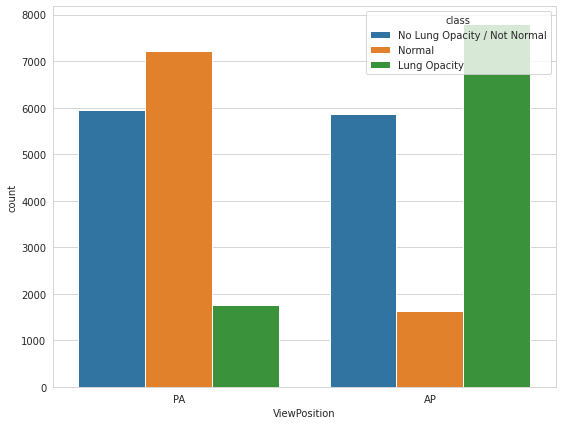

In [37]:
plt.figure(figsize = (9, 7))
sns.countplot(x = 'ViewPosition', hue = 'class', data = merged_df);

In [38]:
merged_df['PatientSex'] = merged_df['PatientSex'].map({'F': 0, 'M': 1})
merged_df['ViewPosition'] = merged_df['ViewPosition'].map({'PA': 0, 'AP': 1})
merged_df.head()

,patientId,x,y,width,height,Target,class,PatientAge,ViewPosition,PatientSex
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,51,0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,48,0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,19,1,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,Normal,28,0,1
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,32,1,0


In [39]:
merged_df.corr()

,x,y,width,height,Target,PatientAge,ViewPosition,PatientSex
x,1.000000,0.762055,0.795007,0.735061,0.846951,-0.053137,0.361044,0.009206
y,0.762055,1.000000,0.811707,0.634177,0.897660,-0.024397,0.353190,0.028091
width,0.795007,0.811707,1.000000,0.915537,0.950152,-0.049035,0.411144,0.037665
height,0.735061,0.634177,0.915537,1.000000,0.865294,-0.050976,0.423878,0.029863
Target,0.846951,0.897660,0.950152,0.865294,1.000000,-0.056878,0.420189,0.016940
PatientAge,-0.053137,-0.024397,-0.049035,-0.050976,-0.056878,1.000000,-0.060333,-0.009842
ViewPosition,0.361044,0.353190,0.411144,0.423878,0.420189,-0.060333,1.000000,0.016904
PatientSex,0.009206,0.028091,0.037665,0.029863,0.016940,-0.009842,0.016904,1.000000


In [40]:
def get_feature_distribution(data, feature):
    # Get the count for each label
    label_counts = data[feature].value_counts()

    # Get total number of samples
    total_samples = len(data)

    # Count the number of items in each class
    print("Feature: {}".format(feature))
    for i in range(len(label_counts)):
        label = label_counts.index[i]
        count = label_counts.values[i]
        percent = int((count / total_samples) * 10000) / 100
        print("{:<30d}:   {} or {}%".format(label, count, percent))

get_feature_distribution(merged_df,'ViewPosition')

Feature: ViewPosition
1                             :   15297 or 50.6%
0                             :   14930 or 49.39%


In [41]:
def plot_window(data,color_point, color_window,text):
    fig, ax = plt.subplots(1,1,figsize=(7,7))
    plt.title("Centers of Lung Opacity rectangles over rectangles\n{}".format(text))
    data.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color=color_point)
    for i, crt_sample in data.iterrows():
        ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
            width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color=color_window))
    plt.show()

In [42]:
target1 = merged_df[merged_df['Target']==1]

target_sample = target1.sample(2000)
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2

target_ap = target_sample[target_sample['ViewPosition']==1]
target_pa = target_sample[target_sample['ViewPosition']==0]


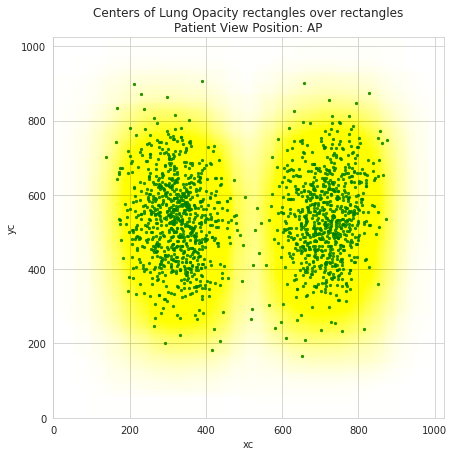

In [43]:
plot_window(target_ap,'green', 'yellow', 'Patient View Position: AP')

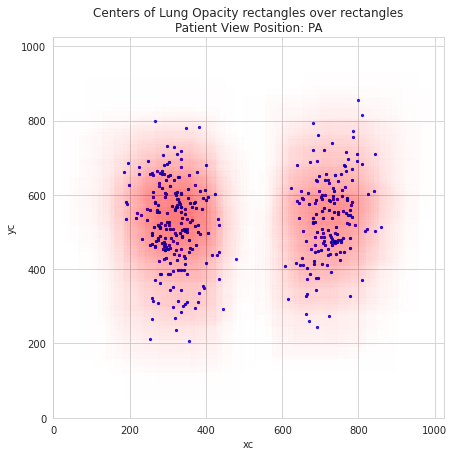

In [44]:
plot_window(target_pa,'blue', 'red', 'Patient View Position: PA')